In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [63]:
CCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/CCA_pval0.001_thresh/CCA_U.csv"
rCCA_U_path = "/Users/fyzeen/FyzeenLocal/GitHub/DrysdaleReplication/code/03_FeatureSelection/02_rCCA/Results/rCCA_pval0.001_thresh/rCCA_U.csv"
CCA_U = pd.read_csv(CCA_U_path, header=None)


In [64]:
data = CCA_U[[0, 1]]
data = data.to_numpy()

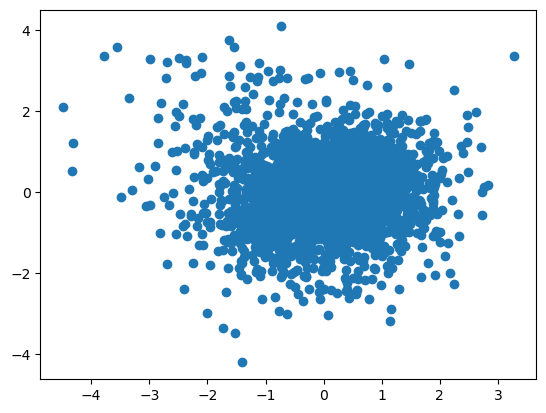

In [65]:
plt.scatter(data[:, 0], data[:, 1])

In [66]:
# Cluster range ∈ [2,11)
cluster_range = range(2, 11)

# Initialize lists to store scores
silhouette_scores = []
variance_ratios = []

# Perform hierarchical clustering for each number of clusters
for n_clusters in cluster_range:
    # Perform hierarchical clustering
    linkage_matrix = linkage(data, method='ward')
    labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    
    # Compute silhouette score
    silhouette_scores.append(silhouette_score(data, labels))
    
    # Compute variance ratio criterion
    variance_ratios.append(calinski_harabasz_score(data, labels))

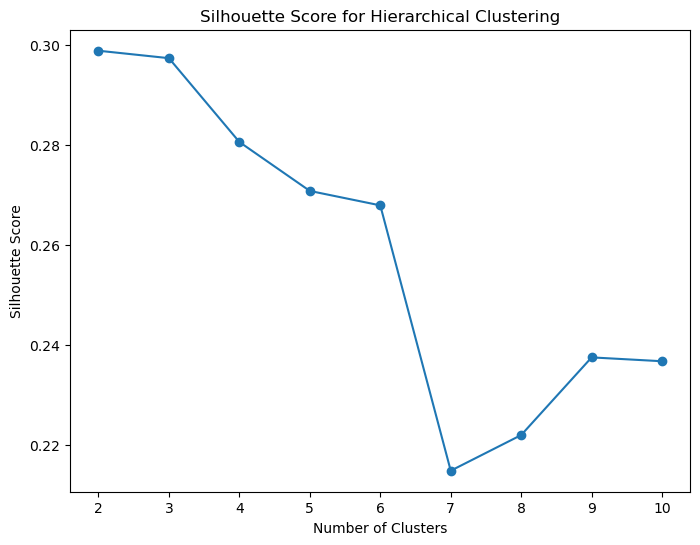

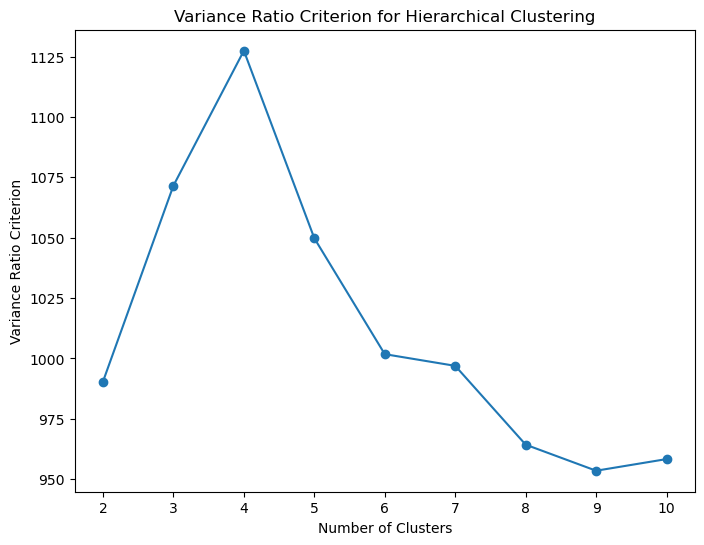

In [67]:
# Plot the silhouette score
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()

# Plot the variance ratio criterion
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, variance_ratios, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Ratio Criterion')
plt.title('Variance Ratio Criterion for Hierarchical Clustering')
plt.show()

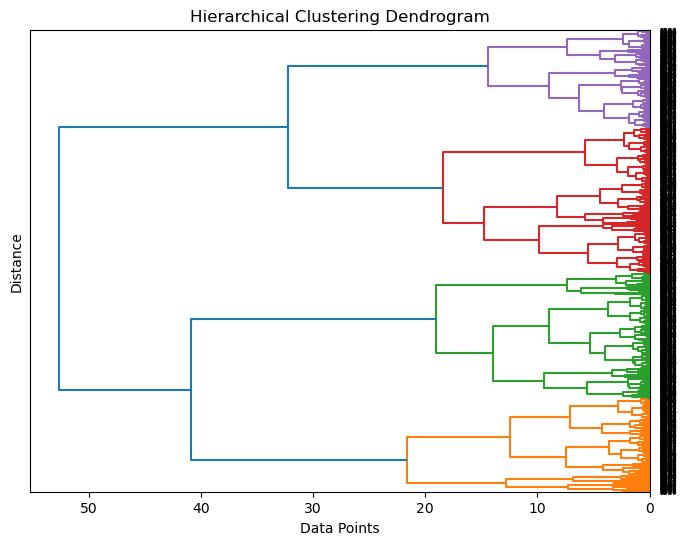

In [74]:
# Perform hierarchical clustering with the optimal number of clusters
linkage_matrix = linkage(data, method='ward')
labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(linkage_matrix, orientation='left', distance_sort='descending', color_threshold=30) # Mess around with this color_threshold var to get the right number of cluster colors
plt.show()

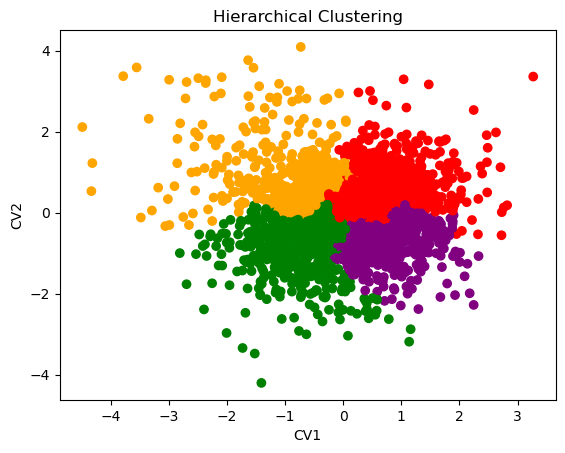

In [75]:
# Plot the scatter plot with colored clusters

# Custom colors to match the dendrogram
colors = ['purple', 'red', 'green', 'orange']
cmap = ListedColormap(colors)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap)
plt.xlabel('CV1')
plt.ylabel('CV2')
plt.title('Hierarchical Clustering')
plt.show()